# Data Analysis Project: Wine
I tried to write a simple program that clusters red wine samples based on their chemical properties and sensory scores, and makes wine recommendations to a user based on their preferred flavor profile and quality. The wine data is loaded into a Pandas DataFrame and the KMeans algorithm from the scikit-learn library is used to determine the cluster assignments for each wine. A function is defined to take a user's preferred flavor profile and quality, and returns a recommendation of wines from the cluster that best matches their preferences. The distribution of quality scores for the recommended wines is also plotted using matplotlib.

The purpose of this project was to gain more exposure to the basics of clustering and the KMeans algorithm, as well as practice data visualization and data anaysis

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the wine quality data into a pandas DataFrame
data = pd.read_csv("winequality-red.csv")

## Clustering using KMeans
This code (below) uses the `KMeans` class to cluster the wines into 5 different groups based on their chemical properties and sensory scores. The `KMeans` class is initialized with `n_clusters=5`, meaning that 5 clusters will be created. The `fit` method is then called on the DataFrame without the `quality` column, which trains the KMeans algorithm on the data. Finally, the `predict` method is used to predict the cluster assignments for each wine, and the cluster assignments are added as a new column in the DataFrame.

In [28]:
# Use KMeans to cluster the wines into different groups based on their chemical properties and sensory scores
kmeans = KMeans(n_clusters=5)
kmeans.fit(data.drop("quality", axis=1))
data["cluster"] = kmeans.predict(data.drop("quality", axis=1))


/Users/jess/miniconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## recommend_wine function
This function takes a user's preferred flavor profile and wine quality as inputs, and returns a recommendation of the top wines in the cluster that is most similar to the user's preferred flavor profile and quality. The `kmeans.predict` method is used to predict the cluster that the user's preferred flavor profile and quality belongs to. The `recommended_wines` DataFrame is created by filtering the original DataFrame to only include wines that belong to the preferred cluster, and then sorting the wines by their `quality` score in descending order.

In [29]:
# Define a function that takes a user's preferred flavor profile and wine quality and returns a recommendation
def recommend_wine(flavor_profile, quality, data):
    num_features = data.shape[1] - 1 # subtract 1 to exclude the cluster column
    input_data = [flavor_profile, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, quality]
    preferred_cluster = kmeans.predict([input_data[:12]])[0]
    recommended_wines = data[data["cluster"] == preferred_cluster].sort_values("quality", ascending=False)
    return recommended_wines

# Example usage
flavor_profile = 7
quality = 7
recommended_wines = recommend_wine(flavor_profile, quality, data)

/Users/jess/miniconda3/lib/python3.8/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


## Data visualization
This plots a histogram of the distribution of quality scores for the recommended wines. The histogram is created using the plt.hist function from the matplotlib library.

The input to the plt.hist function is the "quality" column of the recommended_wines DataFrame, which contains the quality scores for the recommended wines. The bins parameter is set to range(3, 11), which defines the range of possible quality scores and the number of bins to use in the histogram. The edgecolor parameter is set to "black", which sets the color of the edges of the bars in the histogram. The align parameter is set to "left", which aligns the histogram bars to the left.

The plt.xlabel, plt.ylabel, and plt.title functions are used to label the x-axis, y-axis, and title of the histogram, respectively. The plt.xticks function is used to set the x-ticks to the range of possible quality scores. Finally, the plt.show function is used to display the histogram.

The histogram provides a visual representation of the distribution of quality scores for the recommended wines, which can help a user to get a sense of the range and frequency of quality scores for the recommended wines.

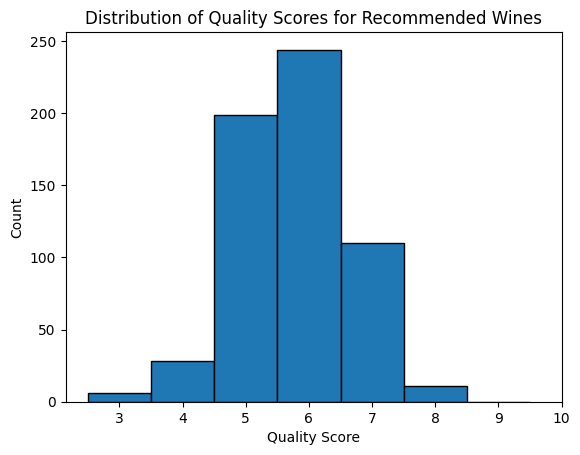

In [30]:
# Plot the distribution of quality scores for the recommended wines
plt.hist(recommended_wines["quality"], bins=range(3, 11), edgecolor="black", align="left")
plt.xlabel("Quality Score")
plt.ylabel("Count")
plt.title("Distribution of Quality Scores for Recommended Wines")
plt.xticks(range(3, 11))
plt.show()


## See the details of recommended wines
The detailed information about each recommended wine is contained in the recommended_wines DataFrame, which is obtained by calling the recommend_wine function with the desired flavor profile and quality. The detailed information about each recommended wine is represented by a subset of columns from the recommended_wines DataFrame. In particular, the following columns are selected:

- "fixed acidity"
- "volatile acidity"
- "citric acid"
- "residual sugar"
- "chlorides"
- "free sulfur dioxide"
- "total sulfur dioxide"
- "density"
- "pH"
- "sulphates"
- "alcohol"
- "quality"

These columns represent various chemical and sensory properties of the recommended wines, such as the levels of acidity, sugar, and alcohol, and the overall quality score. By printing this information, the program provides a detailed look at the recommended wines and their properties, which can help a user to make a informed decision about which wine to choose.

In [31]:
# Print the detailed information about each recommended wine
print("Recommended wines:")
print(recommended_wines[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density", "pH", "sulphates", "alcohol", "quality"]])

plt.show()

Recommended wines:
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
1120            7.9             0.540         0.34            2.50      0.076   
278            10.3             0.320         0.45            6.40      0.073   
498            10.7             0.350         0.53            2.60      0.070   
1549            7.4             0.360         0.30            1.80      0.074   
495            10.7             0.350         0.53            2.60      0.070   
...             ...               ...          ...             ...        ...   
1505            6.7             0.760         0.02            1.80      0.078   
690             7.4             1.185         0.00            4.25      0.097   
1478            7.1             0.875         0.05            5.70      0.082   
517            10.4             0.610         0.49            2.10      0.200   
899             8.3             1.020         0.02            3.40      0.084   

      fr